# Extreme $Re$ Newtonian Similarity

As usual, we will begin by importing the necessary python packages

In [1]:
from barennet import SimilarityModel
import tensorflow as tf
import numpy as np

tf.config.set_visible_devices([], 'GPU')

2024-03-04 16:57:33.873954: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 16:57:34.081847: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 16:57:34.081953: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 16:57:34.110528: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 16:57:34.168716: I tensorflow/core/platform/cpu_feature_guar

We will find the incomplete similarity exponents for the extreme $Re$ newtonian 
mean velocity profile in wall coordinates. We know that the dimensionless quantities
involved are $(u^+, y^+, Re_\tau)$ and, although we don't know the relation between
them, we have reason to believe that they have the following similarity relation:

$$ u^+ = Re_\tau \Phi^{(1)} \left( \frac{y^+}{Re_\tau^{1/12}} \right)$$

We provide a data file with experimental MVP data by McKeon et. al. collected at
the Princeton Superpipe facility. We will use Reynolds numbers in the range 
$2.3 \times 10^6 < Re < 1.3 \times 10^7$. The MDDP construction of the three 
dimensionless quantities is also provided in the code cell below.

In [4]:
data_path = "../Data/extreme_re_MVP_data.xlsx"
dimensionally_independent_parameters = ["mu", "rho", "delta"]
dimensionally_dependent_parameters = ["y", "- dp/dz"]
dimensional_qoi = "u"
non_dimensional_parameters = ["y+", "Re_tau"]
non_dimensional_qoi = "u+"
non_dimensional_params_construction = { 
    "y+": {"y": 1.0, "- dp/dz": 0.5, "mu": -1, "rho": 0.5, "delta": 0.5},
    "Re_tau": {"y": 0.0, "- dp/dz": 0.5, "mu": -1, "rho": 0.5, "delta": 1.5}, 
}
non_dimensional_qoi_construction = {
    "u+": {"u": 1, "y": 0.0, "- dp/dz": -0.5, "mu": 0.0, "rho": 0.5, "delta": -0.5}
}
non_similar_params = ["y+"]
similar_params = ["Re_tau"]

In [5]:
similarity_model = SimilarityModel(
    data_path=data_path,
    dimensionally_independent_params=dimensionally_independent_parameters,
    dimensionally_dependent_params=dimensionally_dependent_parameters,
    dimensional_qoi=dimensional_qoi,
    non_dimensional_params=non_dimensional_parameters,
    non_dimensional_qoi=non_dimensional_qoi,
    non_dimensional_params_construction=non_dimensional_params_construction,
    non_dimesional_qoi_construction=non_dimensional_qoi_construction,
    non_similar_params=non_similar_params,
    similar_params=similar_params)

### Buckingham's Similarity Group

As soon as the dimensionless construction is provided and we create an instance 
of the SimilarityModel class, the Buckingham's similarity group can be calculated
by solving a linear system (chapter 5 of the thesis).
It shoud read:
\begin{align*}
    &\mu^* = A_1 \mu, \ \ \ \rho^* = A_2 \rho, \ \ \ \delta^* = A_3 \delta \\ & \\
    & y^* = A_3 y \\ & \\
    & \left( \frac{dp}{dz} \right)^* = \frac{A_1^2}{A_2 A_3^3} \left( \frac{dp}{dz} \right) \\ & \\
    &U^* = \frac{A_1}{A_2 A_3} U
\end{align*}

And, as you can see, this is exactly the output of the cell below.

In [7]:
similarity_model.print_buckingham_similarity_group()

mu* = A_1^1.0 A_2^0.0 A_3^0.0 mu
rho* = A_1^0.0 A_2^1.0 A_3^0.0 rho
delta* = A_1^0.0 A_2^0.0 A_3^1.0 delta
y* = A_1^0.0 A_2^0.0 A_3^1.0 y
- dp/dz* = A_1^2.0 A_2^-1.0 A_3^-3.0 - dp/dz
u* = A_1^1.0 A_2^-1.0 A_3^-1.0 u


In [9]:
similarity_model.find_incomplete_similarity(n_tries=5, n_epochs=10000, tol=5e-3)

Epoch 1/10000
5/5 - 0s - loss: 418.9401 - 486ms/epoch - 97ms/step
Epoch 2/10000
5/5 - 0s - loss: 402.5506 - 5ms/epoch - 1ms/step
Epoch 3/10000
5/5 - 0s - loss: 377.5344 - 4ms/epoch - 848us/step
Epoch 4/10000
5/5 - 0s - loss: 339.2079 - 5ms/epoch - 914us/step
Epoch 5/10000
5/5 - 0s - loss: 279.2767 - 5ms/epoch - 1ms/step
Epoch 6/10000
5/5 - 0s - loss: 198.0312 - 4ms/epoch - 869us/step
Epoch 7/10000
5/5 - 0s - loss: 120.7805 - 4ms/epoch - 745us/step
Epoch 8/10000
5/5 - 0s - loss: 110.2185 - 5ms/epoch - 1ms/step
Epoch 9/10000
5/5 - 0s - loss: 106.9082 - 4ms/epoch - 862us/step
Epoch 10/10000
5/5 - 0s - loss: 91.3148 - 4ms/epoch - 802us/step
Epoch 11/10000
5/5 - 0s - loss: 94.1203 - 5ms/epoch - 922us/step
Epoch 12/10000
5/5 - 0s - loss: 89.1969 - 5ms/epoch - 949us/step
Epoch 13/10000
5/5 - 0s - loss: 82.4168 - 4ms/epoch - 824us/step
Epoch 14/10000
5/5 - 0s - loss: 79.7407 - 7ms/epoch - 1ms/step
Epoch 15/10000
5/5 - 0s - loss: 75.8541 - 5ms/epoch - 975us/step
Epoch 16/10000
5/5 - 0s - loss: 

In [10]:
similarity_model.incomplete_similarity_exponents_dict

{'y+': {'Re_tau': -0.9774953}, 'u+': {'Re_tau': -0.07385195}}

In [11]:
similarity_model.print_renormalization_group()

mu* = mu
rho* = rho
delta* = delta
- dp/dz* = B_2^1.0 - dp/dz
y* = B_2^-0.011252343654632568 y
u* = B_2^0.5369259752333164 u


In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
plt.rc('mathtext', fontset="cm")
import matplotlib.ticker as mtick
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
import seaborn as sns

from tutorial_utils.physical_methods import laminar_flow_wall_coordinates

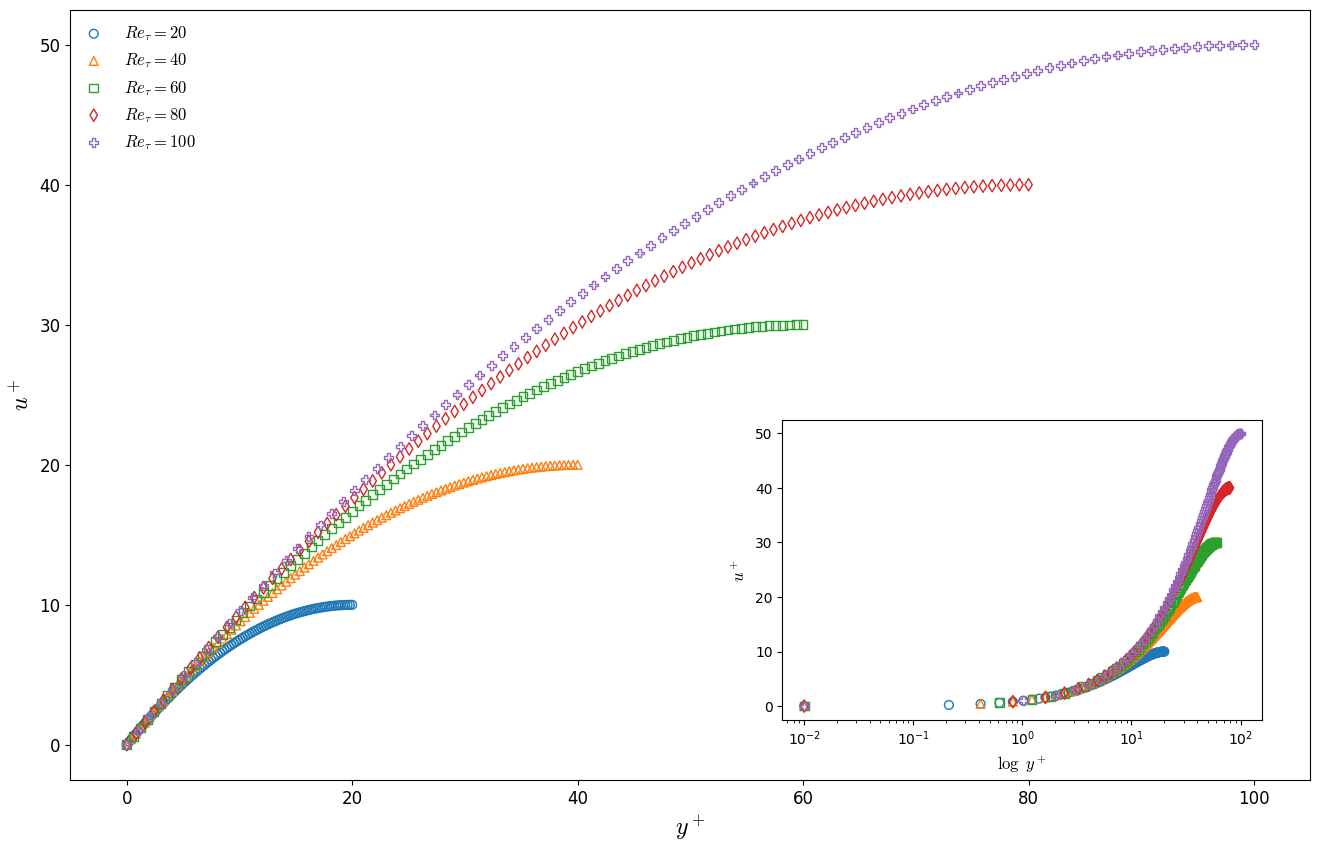

In [34]:
possible_re_tau = [20, 40, 60, 80, 100]
Y_plus_list = []
U_plus_list = []

for re_tau in possible_re_tau:
    Y_plus = []
    U_plus = []

    for y_plus in np.linspace(start=0.01, stop=re_tau, num= 100):
        u_plus = laminar_flow_wall_coordinates(y_plus, re_tau)
        Y_plus.append(y_plus)
        U_plus.append(u_plus)
    
    Y_plus_list.append(Y_plus)
    U_plus_list.append(U_plus)

fig, ax1 = plt.subplots(figsize=(16, 10))

left, bottom, width, height = [0.57, 0.17, 0.3, 0.3] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D']
line_width = 1

for i in range(len(possible_re_tau)):
    ax1.scatter(Y_plus_list[i], U_plus_list[i], alpha = 1, s=40,
                linewidth = line_width, facecolors = 'none', color = colors[i],
                  marker = markers[i], 
                  label = r'$Re_\tau= $'+r'${}$'.format(possible_re_tau[i]))
    
    ax2.scatter(Y_plus_list[i], U_plus_list[i], alpha = 1, s=40,
                linewidth = line_width, facecolors = 'none', color = colors[i],
                  marker = markers[i])
    
font = font_manager.FontProperties(family='DejaVu Sans', weight='roman',
                                   style='normal', size = 'large',
                                   stretch = 'ultra-condensed')

ax1.legend(bbox_to_anchor=(0., 0.99), loc = 'upper left', edgecolor = 'white',
            framealpha = 0, prop = font, borderaxespad=0.)
ax1.set_xlabel(r"$y^+$", size = 'xx-large', fontweight = 'black')
ax1.set_ylabel(r'$u^+$', size = 'xx-large')
#ax1.set_ylim([5,14])
ax1.grid(False)
ax1.tick_params(axis='x', labelsize = 'large')
ax1.tick_params(axis='y', labelsize = 'large')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.set_xlabel(r"$\log \ y^+ $", fontsize = 'large')
ax2.set_ylabel(r'$u^+$', fontsize = 'large')
ax2.set_xscale('log')
ax2.tick_params(axis='x', labelsize = 'medium')
ax2.tick_params(axis='y', labelsize = 'medium')
#ax2.set_xlim([0.01,1])
#ax2.set_ylim([5,14])
ax2.grid(False)

plt.savefig('tutorial_plots/laminar_flow_wall_coordinates.pdf', format='pdf', dpi=1200)
plt.show()

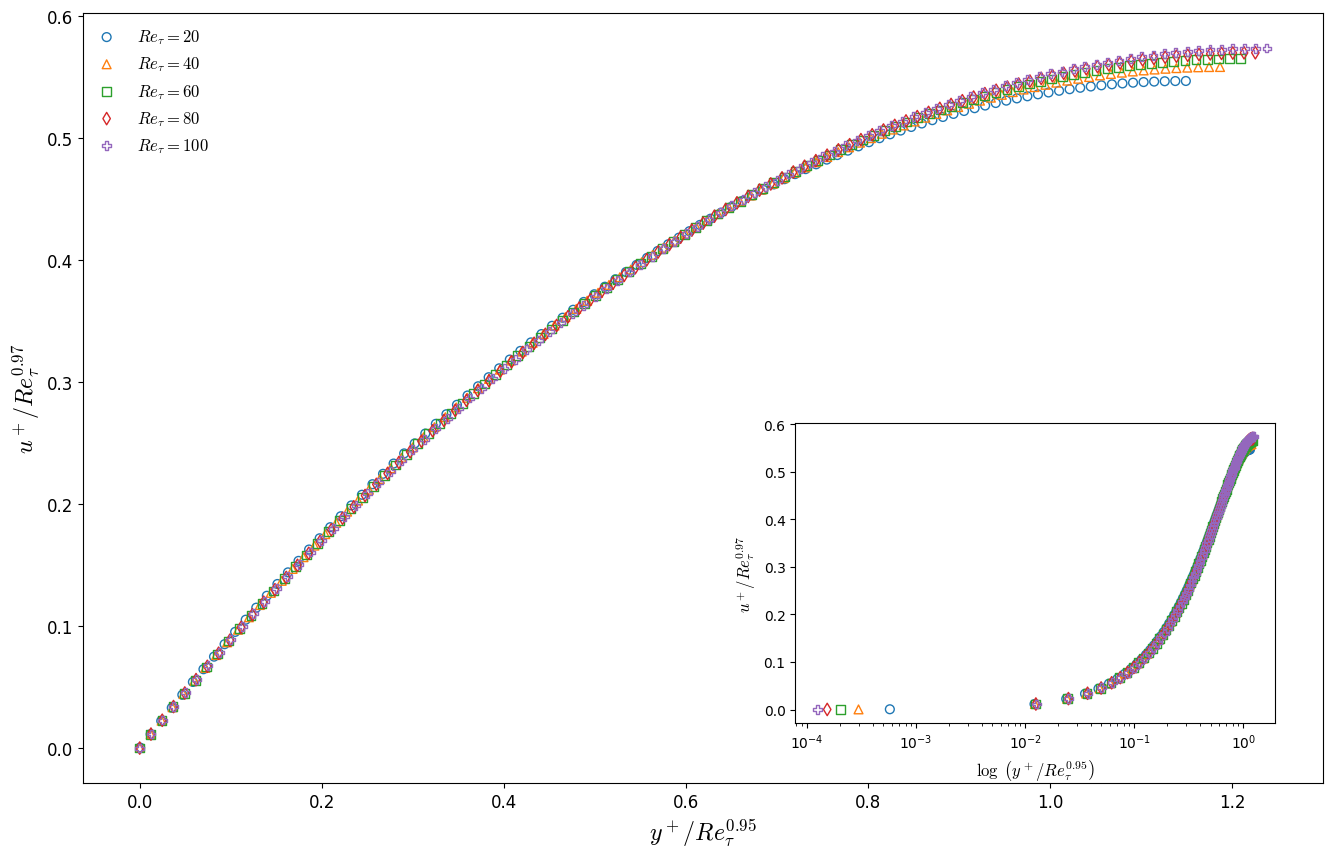

In [40]:
fig, ax1 = plt.subplots(figsize=(16, 10))

left, bottom, width, height = [0.57, 0.17, 0.3, 0.3] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D']
line_width = 1

for i in range(len(possible_re_tau)):
    ax1.scatter(np.array(Y_plus_list[i]) * (possible_re_tau[i] ** similarity_model.incomplete_similarity_exponents_dict['y+']['Re_tau']),
                 np.array(U_plus_list[i]) * (possible_re_tau[i] ** similarity_model.incomplete_similarity_exponents_dict['u+']['Re_tau']),
                 alpha = 1, s=40, linewidth = line_width, facecolors = 'none', 
                 color = colors[i], marker = markers[i], 
                  label = r'$Re_\tau= $'+r'${}$'.format(possible_re_tau[i]))
    
    ax2.scatter(np.array(Y_plus_list[i]) * (possible_re_tau[i] ** similarity_model.incomplete_similarity_exponents_dict['y+']['Re_tau']),
                 np.array(U_plus_list[i]) * (possible_re_tau[i] ** similarity_model.incomplete_similarity_exponents_dict['u+']['Re_tau']),
                 alpha = 1, s=40, linewidth = line_width, facecolors = 'none', 
                 color = colors[i], marker = markers[i], 
                  label = r'$Re_\tau= $'+r'${}$'.format(possible_re_tau[i]))
    
font = font_manager.FontProperties(family='DejaVu Sans', weight='roman',
                                   style='normal', size = 'large',
                                   stretch = 'ultra-condensed')

ax1.legend(bbox_to_anchor=(0., 0.99), loc = 'upper left', edgecolor = 'white',
            framealpha = 0, prop = font, borderaxespad=0.)
ax1.set_xlabel(r"$y^+ / Re_\tau^{0.95}$", size = 'xx-large', fontweight = 'black')
ax1.set_ylabel(r'$u^+ / Re_\tau^{0.97}$', size = 'xx-large')
#ax1.set_ylim([5,14])
ax1.grid(False)
ax1.tick_params(axis='x', labelsize = 'large')
ax1.tick_params(axis='y', labelsize = 'large')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.set_xlabel(r"$\log \ \left( y^+ / Re_\tau^{0.95} \right)$", fontsize = 'large')
ax2.set_ylabel(r'$u^+ / Re_\tau^{0.97}$', fontsize = 'large')
ax2.set_xscale('log')
ax2.tick_params(axis='x', labelsize = 'medium')
ax2.tick_params(axis='y', labelsize = 'medium')
#ax2.set_xlim([0.01,1])
#ax2.set_ylim([5,14])
ax2.grid(False)

plt.savefig('tutorial_plots/laminar_flow_wall_coordinates_renormalized.pdf', 
            format='pdf', 
            dpi=1200)

plt.show()